In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage import exposure

In [2]:
INPUT = 'data/'

In [4]:

def get_array(image, cell):
    height, width = image.shape
    shape_by_height, shape_by_width = round(height / cell[0]), round(width / cell[1])
    resized_image = cv2.resize(image, (shape_by_width * cell[1], shape_by_height * cell[0]))
    brightness_array = np.empty(shape=(shape_by_height, shape_by_width))
    for i in range(shape_by_height):
        for j in range(shape_by_width):
            brightness_array[i][j] = np.mean(resized_image[i * cell[0]:i * cell[0] + cell[0], j * cell[1]:j * cell[1] + cell[1]])
    return brightness_array


def get_array_easy_way(image, cell):
    height, width = image.shape
    shape_by_height, shape_by_width = round(height / cell[0]), round(width / cell[1])
    return cv2.resize(image, (shape_by_width, shape_by_height))
  
    
def equalize(array):
    return exposure.equalize_hist(array)


def normalize(array, new_min, new_max): 
    return new_min + (new_max - new_min) * (array - array.min()) / (array.max() - array.min()) 
    
    
def rounded(array):
    return array.round().astype('int')
    
        
def image_read(filename):
    return cv2.imread(INPUT + filename)

        
def image_transform(image, cell, shades):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    brightness_array = get_array(grayscale_image, cell)
    equalize_array = equalize(brightness_array)
    normalized_array = normalize(equalize_array, 0, shades - 1)
    rounded_array = rounded(normalized_array)
    return rounded_array 


def show_image(image):
    plt.figure(figsize=(40,40))
    plt.imshow(image, cmap='gray')

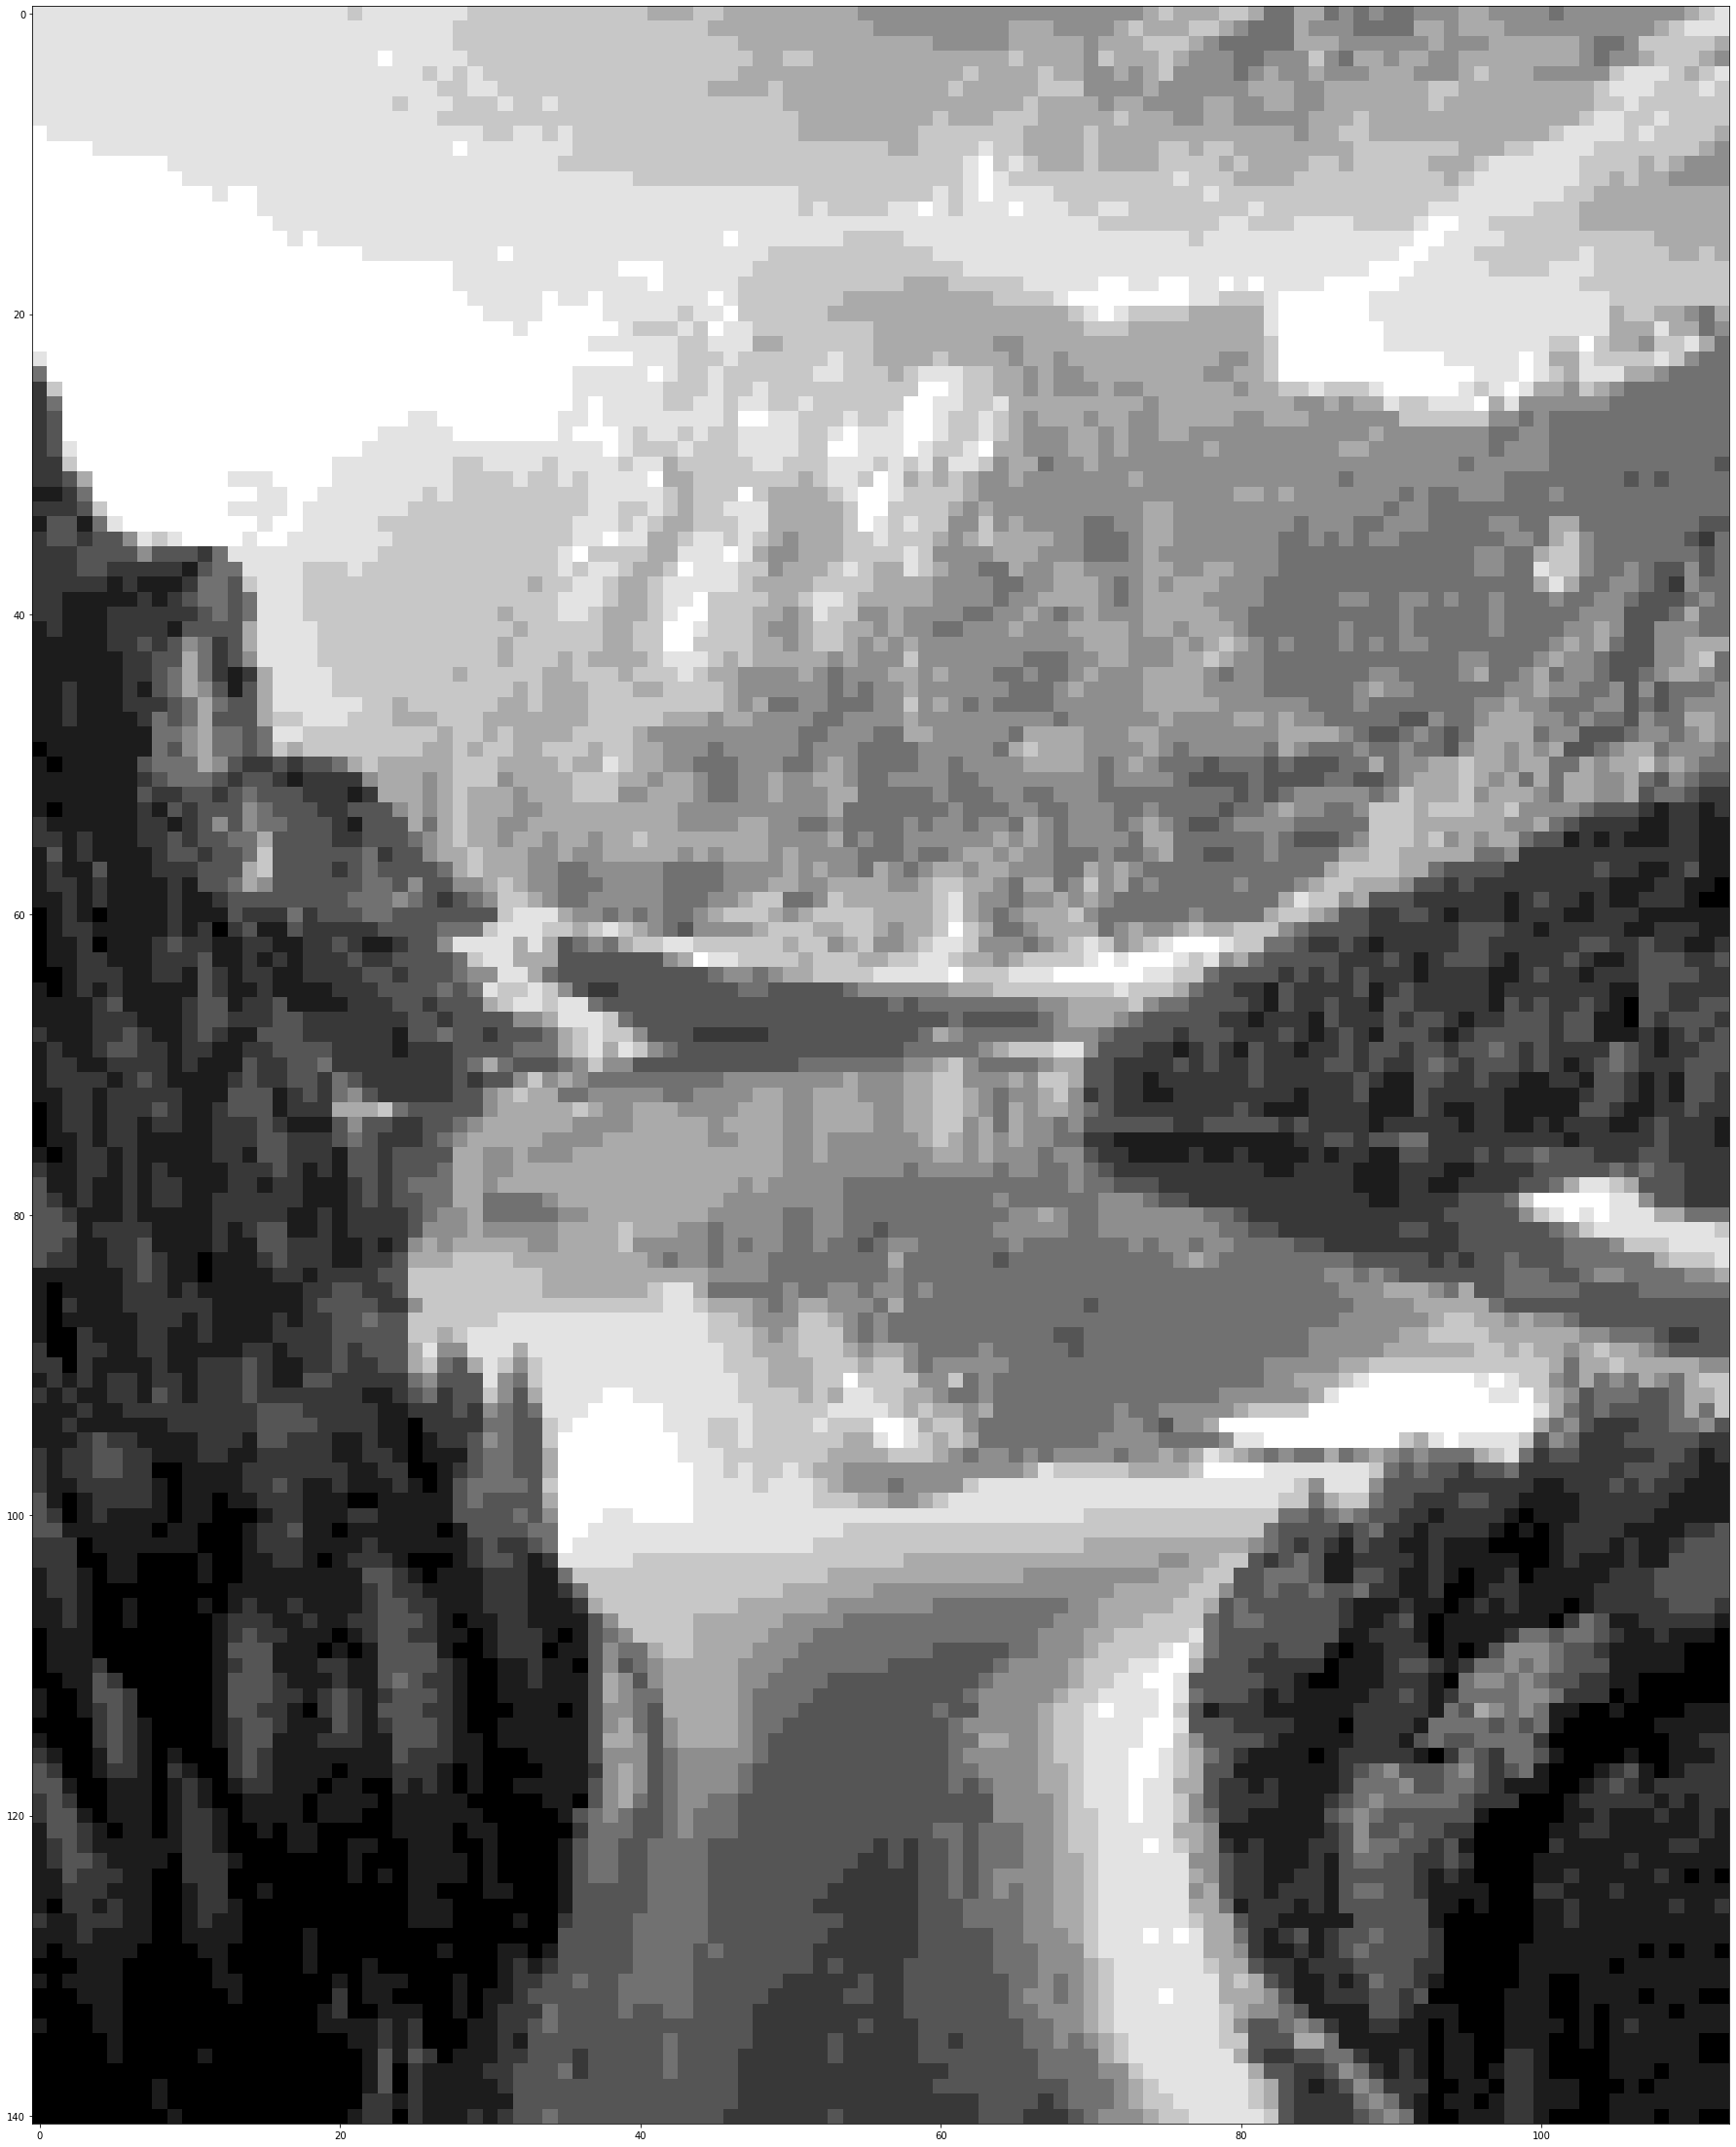

In [9]:
show_image(image_transform(image_read('scenery.jpg'), (5, 5), 10))

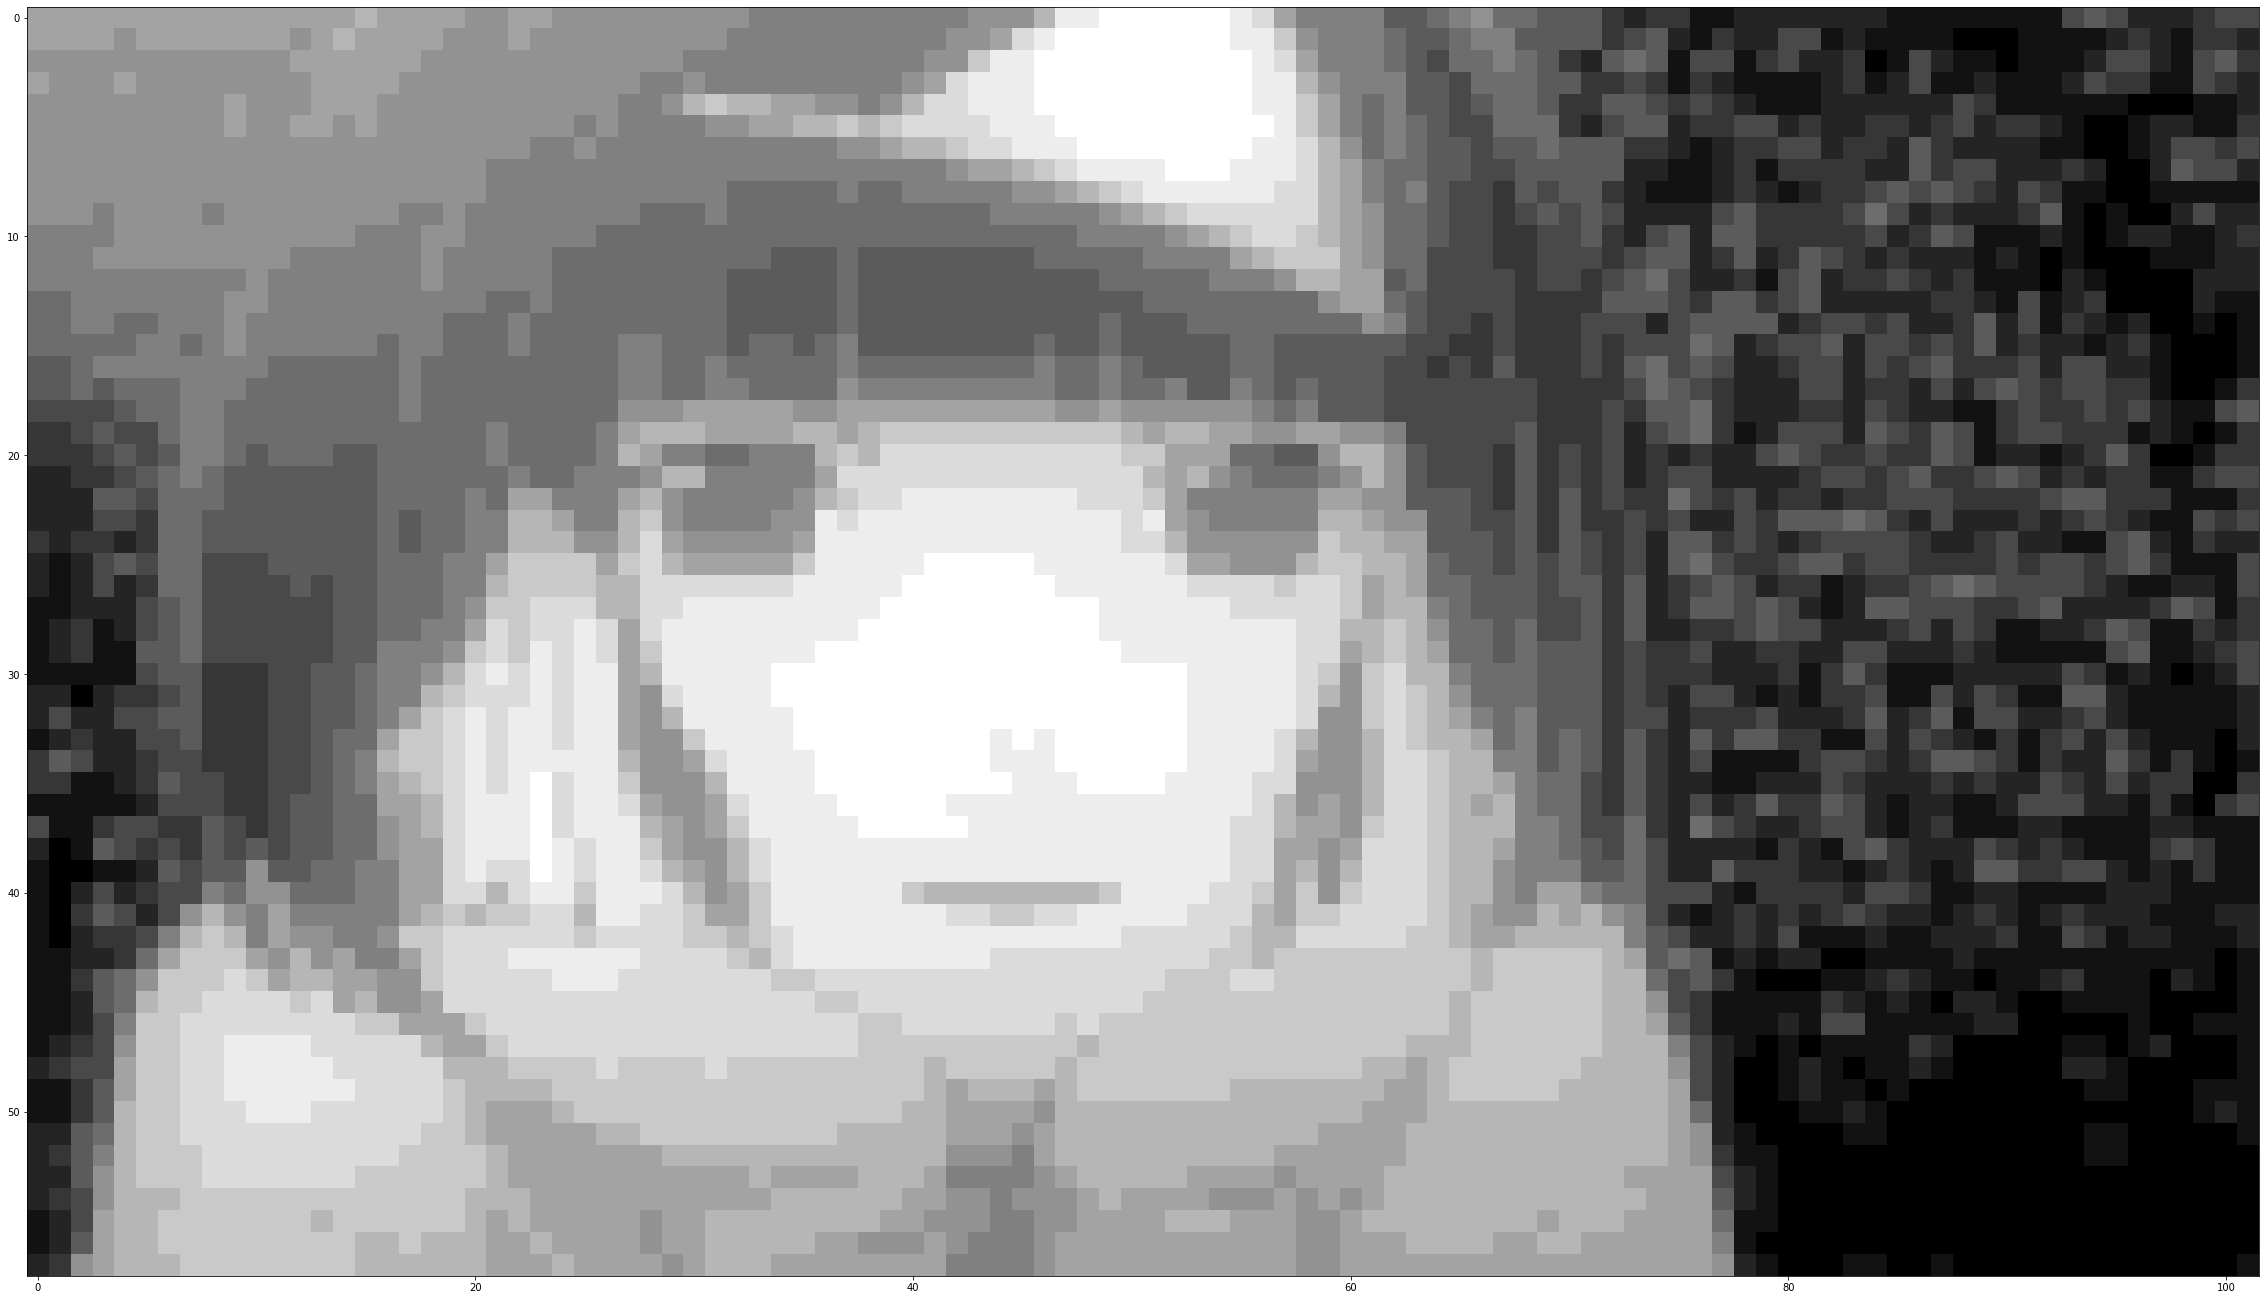

In [16]:
show_image(image_transform(image_read('nora.jpg'), (5, 5), 15))

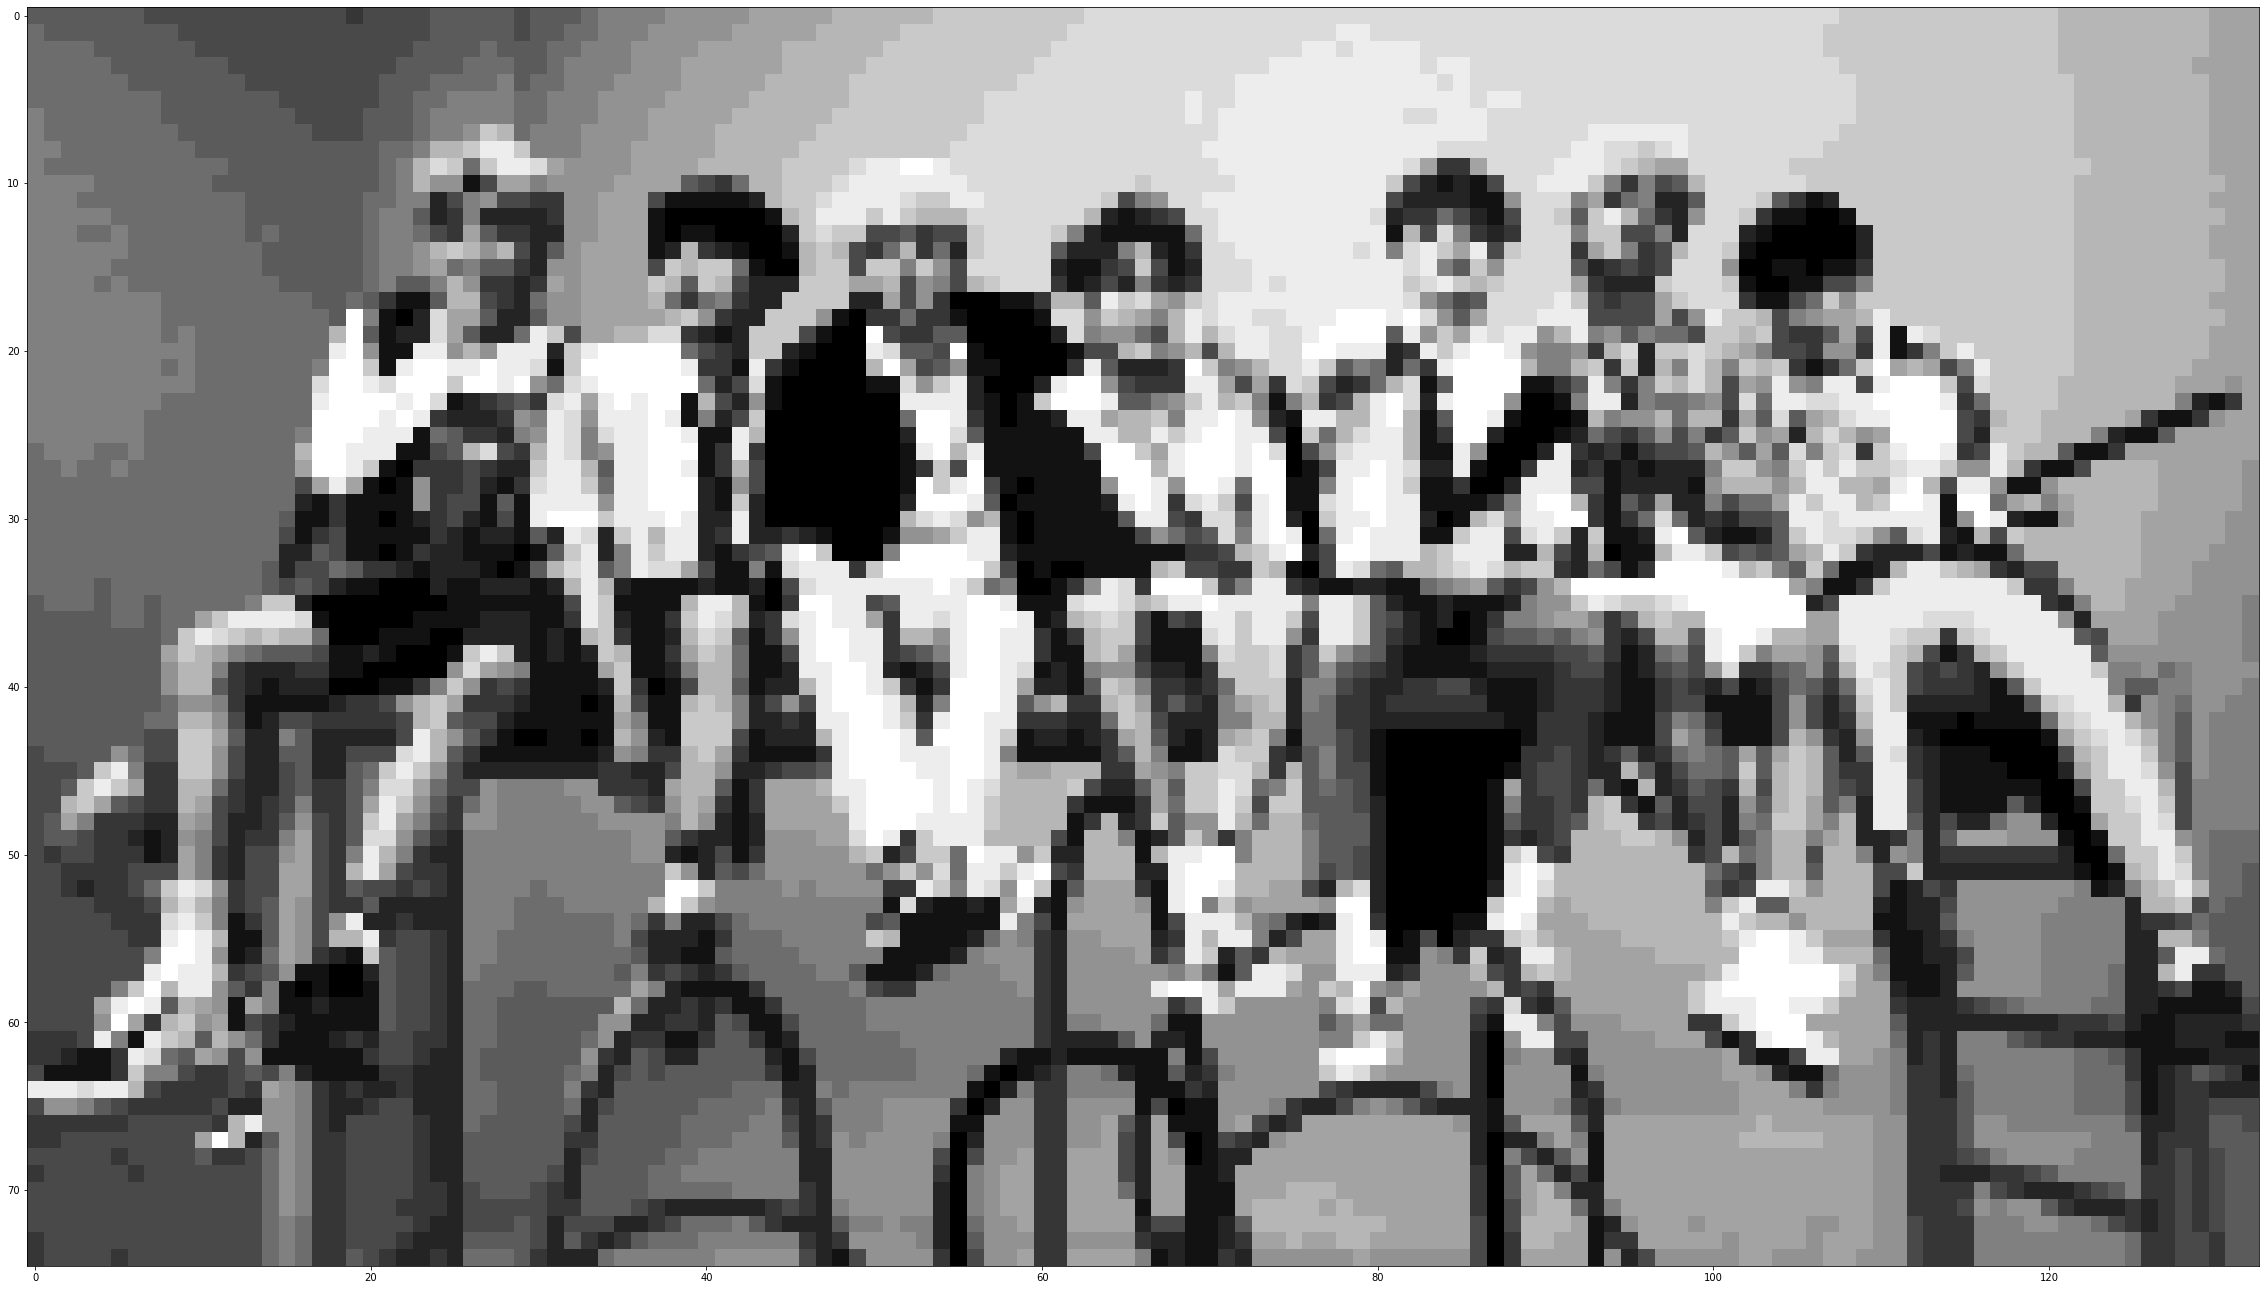

In [19]:
show_image(image_transform(image_read('bts.jpg'), (15, 15), 15))